# Logistic regression for football stats match prediction

***Authors***: Arradi Naoufal, Bienfait Méo, Bouchakour Younes, Sergent Pierre-Louis, Tadjer Badr

### Columns

**Shots**:
- total
- ongoal
- offgoal
- insidebox
- outsidebox

**Passes**:
- total
- percentage(of completed pass)

**Attacks**:
- total
- dangerous

**Others**:
- Fouls
- Corners
- Possession_time
- Yellow_cards
- Red_cards
- Saves
- Substitutions
- Tackles
- Penalties
- Injuries

**Output**: win = 1, draw = 0, loss = -1
### About data

We will use all the games of season 2020/2021 of the Scotland football league. In order to have relevant data for our model, we will get all the stats of each game and then we will compare them by making the difference between the two teams to keep track of the dominance of each team in specific areas. Then we'll be able to train our data to predict winners based on the stats of each games and establish the most important metrics to win a game of football.

**Example**:
||round|passes|shots|attacks|penalties|red_cards|output|
|-|-|-|-|-|-|-|-|
|team a|1|200|3|10|0|0|1|
|team b|1|-200|-3|-10|0|0|-1|

Here the *team a* did 200 **more** passes than his opponent, and had 3 **more** shots.
The *team b* did 200 **less** passes than his opponent, and had 3 **less** shots.

In [41]:
import pandas as pd

df_games_stats = pd.read_csv("../data/data.csv", index_col=0)

df_games_stats.head()

,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202,-10.47,-18,...,-4.0,-22,1.0,1.0,2.0,3.0,-8,NaN,NaN,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202,10.47,18,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8,NaN,NaN,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44,-5.46,-42,...,-3.0,-8,1.0,NaN,2.0,-1.0,-6,NaN,NaN,1
3,258,194968,5,0.0,5.0,1.0,5.0,44,5.46,42,...,3.0,8,-1.0,NaN,-2.0,1.0,6,NaN,NaN,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201,16.08,27,...,0.0,22,-3.0,NaN,0.0,0.0,-2,1.0,NaN,0


In [42]:
# print some info about the dataframe
print(df_games_stats.shape)
df_games_stats.info()

(456, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 455
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_ids           456 non-null    int64  
 1   round_ids          456 non-null    int64  
 2   shots_total        456 non-null    int64  
 3   shots_ongoal       434 non-null    float64
 4   shots_offgoal      446 non-null    float64
 5   shots_insidebox    448 non-null    float64
 6   shots_outsidebox   440 non-null    float64
 7   passes_total       456 non-null    int64  
 8   passes_percentage  456 non-null    float64
 9   attacks_total      456 non-null    int64  
 10  attacks_dangerous  456 non-null    int64  
 11  fouls              410 non-null    float64
 12  corners            448 non-null    float64
 13  possession_time    456 non-null    int64  
 14  yellow_cards       364 non-null    float64
 15  red_cards          38 non-null     float64
 16  saves           

In [43]:
df_games_stats.isnull().sum()

team_ids               0
round_ids              0
shots_total            0
shots_ongoal          22
shots_offgoal         10
shots_insidebox        8
shots_outsidebox      16
passes_total           0
passes_percentage      0
attacks_total          0
attacks_dangerous      0
fouls                 46
corners                8
possession_time        0
yellow_cards          92
red_cards            418
saves                 36
substitutions          2
tackles                0
penalties            390
injuries             402
results                0
dtype: int64

## Cleaning data

We can see that we have none values for several columns, according to the data that we are processing we will replace the NaN values by 0 since a NaN value means none of this stat occurred during the game. Therefore no columns will be droped. 

In [44]:
df_games_stats.fillna(0, inplace=True)
df_games_stats.isnull().sum()

team_ids             0
round_ids            0
shots_total          0
shots_ongoal         0
shots_offgoal        0
shots_insidebox      0
shots_outsidebox     0
passes_total         0
passes_percentage    0
attacks_total        0
attacks_dangerous    0
fouls                0
corners              0
possession_time      0
yellow_cards         0
red_cards            0
saves                0
substitutions        0
tackles              0
penalties            0
injuries             0
results              0
dtype: int64

## Win/loss or draw

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

def game_output_results(df_in=df_games_stats):
    df = pd.DataFrame()
    df["total"] = df_in.groupby("results").size()

    df.drop(index=-1, inplace=True)
    df.rename(index={0: "draw", 1: "win_or_loss"}, inplace=True)

    df.iloc[0]["total"] = df.iloc[0]["total"]/2

    df["percentage"] = round(df["total"] / (df_in.shape[0]//2) * 100)

    print(f"{df}\n")
    print(f"Total games: {df_in.shape[0]//2}")

    df["total"].plot(kind="bar", title="Output of games")
    plt.show()

             total  percentage
results                       
draw            57        25.0
win_or_loss    171        75.0

Total games: 228


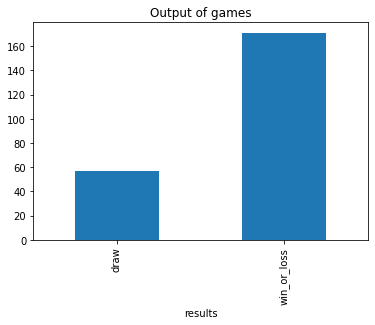

In [46]:
game_output_results()

## Total stats per season

We are doing an other dataframe which contains the sum of the +/- of each stats for each game of the season grouped by team.

This could be useful to see the overall stats of each team during the season, we could even apply our machine learning model to this dataframe in order to predict the winner of the championship.

In [47]:
df_team_stats = pd.DataFrame()

for col in df_games_stats.columns[2:]:
    df_team_stats[str(col)] = df_games_stats.groupby("team_ids").sum()[str(col)]
    
df_team_stats

,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,attacks_dangerous,fouls,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
team_ids,,,,,,,,,,,,,,,,,,,,
53,351,122.0,207.0,170.0,158.0,11461,675.71,1718,1031,5.0,94.0,1242,-22.0,0.0,-94.0,21.0,-224,-2.0,-5.0,17
62,323,121.0,197.0,241.0,99.0,10887,648.20,1199,1175,-52.0,101.0,1180,-28.0,-4.0,-38.0,0.0,-80,4.0,-3.0,32
66,16,33.0,-11.0,67.0,-57.0,-1143,-58.29,-452,-14,-10.0,34.0,-78,5.0,-3.0,-5.0,-17.0,37,2.0,-2.0,7
180,-85,-7.0,-81.0,-33.0,-46.0,-2379,-134.95,-9,94,-46.0,-1.0,-270,-3.0,3.0,-15.0,-5.0,12,2.0,1.0,-12
246,-149,-62.0,-85.0,-101.0,-52.0,-1457,-88.06,-334,-500,100.0,-79.0,-164,30.0,2.0,25.0,13.0,43,-5.0,3.0,-10
258,15,0.0,10.0,-29.0,9.0,-2321,-139.09,244,108,62.0,36.0,-224,2.0,0.0,8.0,8.0,211,-2.0,3.0,-5
273,18,-3.0,14.0,29.0,24.0,-185,64.30,-410,-126,21.0,-4.0,42,-3.0,0.0,-13.0,11.0,-78,0.0,0.0,3
282,-251,-99.0,-137.0,-151.0,-72.0,-1544,-157.28,-716,-840,25.0,-95.0,-220,8.0,0.0,67.0,-22.0,3,1.0,-2.0,-4
309,-64,-32.0,-19.0,-56.0,-32.0,-2199,-88.05,-283,-457,-35.0,-19.0,-264,-2.0,1.0,14.0,-15.0,-93,1.0,0.0,-5


## Model training

All of our colmuns will be predictors besides the `team_ids` and the `round_ids` and the outputs `results`.

In [48]:
predictors = df_games_stats.columns[2:-1]
predictors

Index(['shots_total', 'shots_ongoal', 'shots_offgoal', 'shots_insidebox',
       'shots_outsidebox', 'passes_total', 'passes_percentage',
       'attacks_total', 'attacks_dangerous', 'fouls', 'corners',
       'possession_time', 'yellow_cards', 'red_cards', 'saves',
       'substitutions', 'tackles', 'penalties', 'injuries'],
      dtype='object')

In [49]:
for col in predictors: # Loop through all columns in predictors
    if df_games_stats[col].dtype == 'object':  # check if column's type is object (text)
        df_games_stats[col] = pd.Categorical(df_games_stats[col]).codes  # convert text to numerical

df_games_stats.head()

,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202,-10.47,-18,...,-4.0,-22,1.0,1.0,2.0,3.0,-8,0.0,0.0,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202,10.47,18,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8,0.0,0.0,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44,-5.46,-42,...,-3.0,-8,1.0,0.0,2.0,-1.0,-6,0.0,0.0,1
3,258,194968,5,0.0,5.0,1.0,5.0,44,5.46,42,...,3.0,8,-1.0,0.0,-2.0,1.0,6,0.0,0.0,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201,16.08,27,...,0.0,22,-3.0,0.0,0.0,0.0,-2,1.0,0.0,0


In [50]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data=df_games_stats["results"])
x = pd.DataFrame(data=df_games_stats[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (319, 19) (319, 1)
test shape (137, 19) (137, 1)


In [51]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1, solver='liblinear', max_iter=100)
clf.fit(X_train, y_train.values.ravel())

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.7178683385579937
test accuracy = 0.656934306569343


We can see that both the train and test accuracy are pretty low. We think it might be because of the large amount of columns. We'll try to train our model again after droping a few less predictive columns.

In [52]:
col_to_remove = {"substitutions", "injuries", "tackles", "fouls", "yellow_cards"}
predictors = list(set(predictors) - col_to_remove)
predictors = sorted(predictors)
print(predictors)

y = pd.DataFrame(data=df_games_stats["results"])
x = pd.DataFrame(data=df_games_stats[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=111)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

['attacks_dangerous', 'attacks_total', 'corners', 'passes_percentage', 'passes_total', 'penalties', 'possession_time', 'red_cards', 'saves', 'shots_insidebox', 'shots_offgoal', 'shots_ongoal', 'shots_outsidebox', 'shots_total']
train shape (319, 14) (319, 1)
test shape (137, 14) (137, 1)


In [53]:
clf = LogisticRegression(random_state=1, solver='liblinear', max_iter=100)
clf.fit(X_train, y_train.values.ravel())

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.7178683385579937
test accuracy = 0.656934306569343


The results are still pretty bad so we will try the following steps to improve our data:
- add more data
- PCA

## New data (extended)

In [54]:
df_games_stats_ext = pd.read_csv("../data/data_extended.csv", index_col=0)

print(df_games_stats_ext.shape)

(1282, 22)


In [55]:
df_games_stats_ext.isnull().sum()

team_ids                0
round_ids               0
shots_total             0
shots_ongoal           46
shots_offgoal          12
shots_insidebox         8
shots_outsidebox       26
passes_total            4
passes_percentage       6
attacks_total           2
attacks_dangerous       2
fouls                  46
corners                14
possession_time         0
yellow_cards          198
red_cards            1180
saves                  94
substitutions          16
tackles                16
penalties            1080
injuries              780
results                 0
dtype: int64

In [56]:
df_games_stats_ext.fillna(0, inplace=True)
df_games_stats_ext.isnull().sum()

team_ids             0
round_ids            0
shots_total          0
shots_ongoal         0
shots_offgoal        0
shots_insidebox      0
shots_outsidebox     0
passes_total         0
passes_percentage    0
attacks_total        0
attacks_dangerous    0
fouls                0
corners              0
possession_time      0
yellow_cards         0
red_cards            0
saves                0
substitutions        0
tackles              0
penalties            0
injuries             0
results              0
dtype: int64

In [57]:
df_games_stats_ext

,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202.0,-10.47,-18.0,...,-4.0,-22,1.0,1.0,2.0,3.0,-8.0,0.0,0.0,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202.0,10.47,18.0,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8.0,0.0,0.0,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44.0,-5.46,-42.0,...,-3.0,-8,1.0,0.0,2.0,-1.0,-6.0,0.0,0.0,1
3,258,194968,5,0.0,5.0,1.0,5.0,44.0,5.46,42.0,...,3.0,8,-1.0,0.0,-2.0,1.0,6.0,0.0,0.0,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201.0,16.08,27.0,...,0.0,22,-3.0,0.0,0.0,0.0,-2.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,1703,194388,-16,-4.0,-12.0,-10.0,-3.0,-289.0,-21.21,-55.0,...,-8.0,-38,0.0,0.0,2.0,1.0,1.0,0.0,1.0,-1
1278,1789,194388,-9,-4.0,-5.0,-6.0,-3.0,-264.0,-9.16,-31.0,...,-6.0,-28,0.0,0.0,2.0,-1.0,8.0,0.0,1.0,-1
1279,86,194388,9,4.0,5.0,6.0,3.0,264.0,9.16,31.0,...,6.0,28,0.0,0.0,-2.0,1.0,-8.0,0.0,-1.0,1
1280,2650,194388,1,-1.0,2.0,7.0,-3.0,-65.0,-4.16,10.0,...,-1.0,-10,0.0,0.0,0.0,1.0,-4.0,1.0,2.0,0


             total  percentage
results                       
draw           154        24.0
win_or_loss    487        76.0

Total games: 641


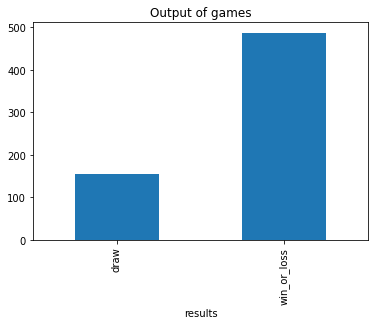

In [58]:
game_output_results(df_in=df_games_stats_ext)

Data amplification

             total  percentage
results                       
draw           462        49.0
win_or_loss    487        51.0

Total games: 949


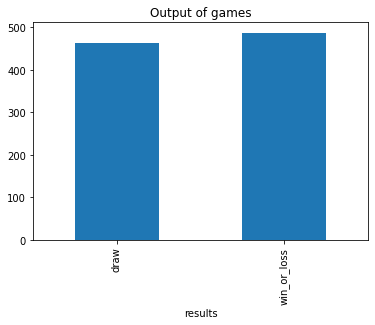

team_ids             0
round_ids            0
shots_total          0
shots_ongoal         0
shots_offgoal        0
shots_insidebox      0
shots_outsidebox     0
passes_total         0
passes_percentage    0
attacks_total        0
attacks_dangerous    0
fouls                0
corners              0
possession_time      0
yellow_cards         0
red_cards            0
saves                0
substitutions        0
tackles              0
penalties            0
injuries             0
results              0
dtype: int64

In [91]:
df_ampl = df_games_stats_ext
draw_games = df_games_stats_ext["results"] == 0
df_inter = df_games_stats_ext[draw_games]

df_ampl = df_ampl.append([df_inter]*2, ignore_index=True)

game_output_results(df_in=df_ampl)

In [93]:
y = pd.DataFrame(data=df_games_stats_ext["results"])
x = pd.DataFrame(data=df_games_stats_ext[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=111)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

clf_ext = LogisticRegression(random_state=1, solver="newton-cg", multi_class="multinomial")
clf_ext.fit(X_train, y_train.values.ravel())

train_score = clf_ext.score(X_train, y_train)
test_score = clf_ext.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train shape (897, 14) (897, 1)
test shape (385, 14) (385, 1)
train accuracy = 0.6778149386845039
test accuracy = 0.6493506493506493


In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_ext, df_games_stats_ext[predictors], df_games_stats_ext["results"], scoring='accuracy', cv=5)
print(scores)
print("Mean:", scores.mean())

[0.67315175 0.6770428  0.65234375 0.56640625 0.6953125 ]
Mean: 0.6528514105058366


[[113   5  21]
 [ 40  12  44]
 [ 15  10 125]]
              precision    recall  f1-score   support

          -1       0.67      0.81      0.74       139
           0       0.44      0.12      0.20        96
           1       0.66      0.83      0.74       150

    accuracy                           0.65       385
   macro avg       0.59      0.59      0.56       385
weighted avg       0.61      0.65      0.60       385



[Text(0.5, 51.0, 'predicted'), Text(51.0, 0.5, 'actual')]

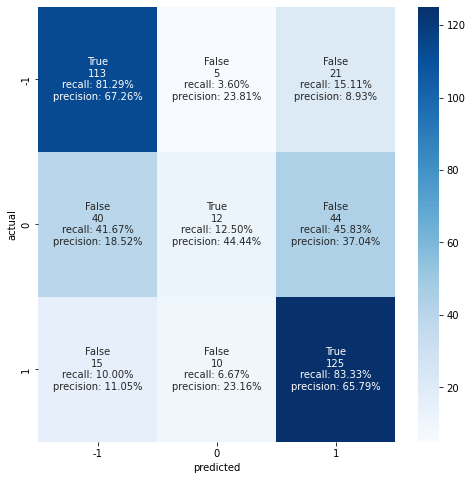

In [62]:
from sklearn import metrics
import seaborn as sns
import numpy as np

# predict class labels for the test set
y_pred = clf_ext.predict(X_test)

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)

print(metrics.classification_report(y_test, y_pred))

df_cm = pd.DataFrame(cf_matrix, index = [i for i in ["-1", "0", "1"]],
                  columns = [i for i in ["-1", "0", "1"]])

group_names = ["True", "False", "False", "False", "True", "False", "False", "False", "True"]

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

recalls = []
for values in cf_matrix:
	row = []
	for val in values:
		row.append(f"recall: {val/values.sum():.2%}")
	recalls += row

precisions = []
cf_vals = {}
for i, values in enumerate(cf_matrix):
	cf_vals[i] = values

for x, y, z in zip(cf_vals[0], cf_vals[1], cf_vals[2]):
	row = []
	values = [x, y, z]

	for val in values:
		row.append(f"precision: {val/sum(values):.2%}")
	precisions += row


labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in
          zip(group_names, group_counts, recalls, precisions)]

labels = np.asarray(labels).reshape(3,3)

fig, ax = plt.subplots(figsize=(8, 8))  
cf = sns.heatmap(df_cm, annot=labels, fmt="", cmap='Blues')
cf.set(xlabel="predicted", ylabel="actual")

We can see that the draw game prediction has a poor precision. We will address that alter. 

We will now try several different algorithm to see if any performs better (see other files).

attacks_dangerous: 0.005374200269885351
attacks_total: 0.001194446243439738
corners: 0.023542329794216065
passes_percentage: -0.024910750405940107
passes_total: -0.009909667761082631
penalties: -0.2524109374099784
possession_time: 0.10201128037652038
red_cards: 0.4993265182385866
saves: -0.42502619745796844
shots_insidebox: -0.14063935221304488
shots_offgoal: 0.3402281203144703
shots_ongoal: -0.2318319096144384
shots_outsidebox: -0.09629770982171487
shots_total: -0.23946945645643114


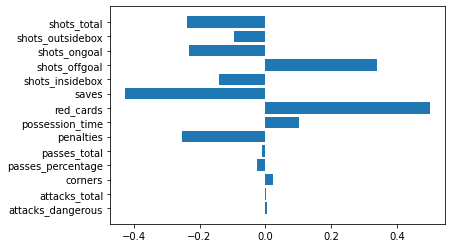

In [63]:
importance = clf_ext.coef_[0]
# summarize feature importance
for imp, col  in zip(importance, predictors):
	print(f"{col}: {imp}")
# plot feature importance
plt.barh(predictors, importance)
plt.show()

## PCA

### First method

In [64]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
standardized = StandardScaler().fit_transform(df_games_stats_ext[predictors])
standardized

array([[-0.53764347, -0.47043979, -0.95864301, ..., -0.58771839,
        -1.56191592, -1.34995997],
       [ 0.53764347,  0.47043979,  0.95864301, ...,  0.58771839,
         1.56191592,  1.34995997],
       [-0.60932926, -1.09769285, -0.71898226, ...,  0.        ,
        -1.3015966 , -0.61361817],
       ...,
       [ 1.5412446 ,  0.81020186,  1.43796451, ...,  1.17543678,
         0.78095796,  1.1045127 ],
       [-0.50180057,  0.26135544, -0.23966075, ..., -0.29385919,
        -0.78095796,  0.12272363],
       [ 0.50180057, -0.26135544,  0.23966075, ...,  0.29385919,
         0.78095796, -0.12272363]])

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

principalComponents = pca.fit_transform(standardized)

principal_df = pd.DataFrame(data=principalComponents
             , columns=[f"principal comp {i}" for i in range(1, 9)])

final_df = pd.concat([principal_df, df_games_stats_ext[['results']]], axis = 1)
final_df

,principal comp 1,principal comp 2,principal comp 3,principal comp 4,principal comp 5,principal comp 6,principal comp 7,principal comp 8,results
0,-3.503775,0.451425,2.637267,-0.174108,2.318663,0.553971,-0.339707,0.219160,-1
1,3.503775,-0.451425,-2.637267,0.174108,-2.318663,-0.553971,0.339707,-0.219160,1
2,-2.050646,0.091280,-0.006643,0.643995,-0.050117,0.455431,-0.597748,-0.644863,1
3,2.050646,-0.091280,0.006643,-0.643995,0.050117,-0.455431,0.597748,0.644863,-1
4,2.044617,0.904292,1.581805,0.896523,-1.447862,-1.024998,-0.266214,-0.278990,0
...,...,...,...,...,...,...,...,...,...
1277,-5.734084,-0.297066,-0.312139,0.513275,-0.022889,-0.855938,0.126273,0.311429,-1
1278,-3.753477,-0.084964,-0.027471,-0.089113,-0.335056,-0.443512,-0.382347,0.256791,-1
1279,3.753477,0.084964,0.027471,0.089113,0.335056,0.443512,0.382347,-0.256791,1
1280,-0.158063,-0.958924,1.804698,1.029787,-1.488182,0.351491,-0.707425,0.055848,0


In [66]:
pca.explained_variance_ratio_.sum()

0.9533488204727183

In [67]:
y = pd.DataFrame(data=final_df["results"])
x = pd.DataFrame(data=final_df[[f"principal comp {i}" for i in range(1, 6)]])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=111)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

clf_pca = LogisticRegression(random_state=1, solver='liblinear', max_iter=100)
clf_pca.fit(X_train, y_train.values.ravel())

train_score = clf_pca.score(X_train, y_train)
test_score = clf_pca.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train shape (897, 5) (897, 1)
test shape (385, 5) (385, 1)
train accuracy = 0.5574136008918618
test accuracy = 0.5376623376623376


### Second method

In [68]:
y = pd.DataFrame(data=df_games_stats_ext["results"])
x = pd.DataFrame(data=df_games_stats_ext[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [69]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [71]:
clf_pca2 = LogisticRegression(random_state=1, solver='lbfgs', max_iter=100)
clf_pca2.fit(X_train, y_train.values.ravel())

train_score = clf_pca2.score(X_train, y_train)
test_score = clf_pca2.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.5696767001114827
test accuracy = 0.5922077922077922


## An other approach

With results arround 60 to 65% of accuracy for every model used we think we'll not be able to go higher. Those results are actually pretty good since we have a 33% chance to choose the right output randomly. Also football is a game where stats are maybe less relevant than other sport like basketball for example.

One last think we want to try is to get rid of the draw games in our data and make it a binary classification. Indeed, it might be difficult for our model to determine if a game is a draw based on stats (as we saw on our confusion matrix), so we'll try this just to see if we can get better accuracy.

Delete row where results = 0

In [72]:
df_games_wo_draw = df_games_stats_ext.drop(df_games_stats_ext[df_games_stats_ext.results == 0].index)
print(df_games_wo_draw.shape)

df_games_wo_draw

(974, 22)


,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202.0,-10.47,-18.0,...,-4.0,-22,1.0,1.0,2.0,3.0,-8.0,0.0,0.0,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202.0,10.47,18.0,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8.0,0.0,0.0,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44.0,-5.46,-42.0,...,-3.0,-8,1.0,0.0,2.0,-1.0,-6.0,0.0,0.0,1
3,258,194968,5,0.0,5.0,1.0,5.0,44.0,5.46,42.0,...,3.0,8,-1.0,0.0,-2.0,1.0,6.0,0.0,0.0,-1
6,66,194968,-2,2.0,-4.0,2.0,-3.0,-78.0,-8.39,-62.0,...,1.0,-12,0.0,0.0,1.0,0.0,-3.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1371,194388,7,0.0,7.0,5.0,1.0,118.0,4.44,16.0,...,-3.0,14,1.0,0.0,-3.0,0.0,-1.0,0.0,0.0,-1
1276,211,194388,16,4.0,12.0,10.0,3.0,289.0,21.21,55.0,...,8.0,38,0.0,0.0,-2.0,-1.0,-1.0,0.0,-1.0,1
1277,1703,194388,-16,-4.0,-12.0,-10.0,-3.0,-289.0,-21.21,-55.0,...,-8.0,-38,0.0,0.0,2.0,1.0,1.0,0.0,1.0,-1
1278,1789,194388,-9,-4.0,-5.0,-6.0,-3.0,-264.0,-9.16,-31.0,...,-6.0,-28,0.0,0.0,2.0,-1.0,8.0,0.0,1.0,-1


             total  percentage
results                       
win_or_loss    243        50.0

Total games: 487


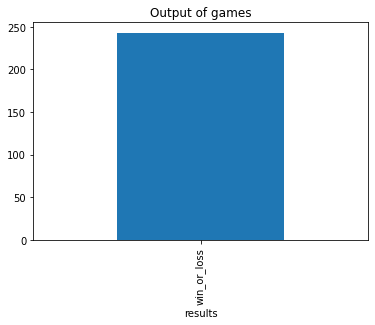

In [73]:
game_output_results(df_in=df_games_wo_draw)

We now have only win or loss results.

In [74]:
y = pd.DataFrame(data=df_games_wo_draw["results"])
x = pd.DataFrame(data=df_games_wo_draw[predictors])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121 )

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

clf_wo_draw = LogisticRegression(random_state=1, solver="liblinear")
clf_wo_draw.fit(X_train, y_train.values.ravel())

train_score = clf_wo_draw.score(X_train, y_train)
test_score = clf_wo_draw.score(X_test, y_test)


print ('train accuracy =', train_score)
print ('test accuracy =', test_score)


train shape (681, 14) (681, 1)
test shape (293, 14) (293, 1)
train accuracy = 0.8634361233480177
test accuracy = 0.8907849829351536


In [75]:
scores = cross_val_score(clf_wo_draw, df_games_wo_draw[predictors], df_games_wo_draw["results"], scoring='accuracy', cv=10)
print(scores)
print("Mean:", scores.mean())

[0.93877551 0.87755102 0.87755102 0.87755102 0.87628866 0.83505155
 0.72164948 0.78350515 0.90721649 0.88659794]
Mean: 0.8581737849779086


              precision    recall  f1-score   support

          -1       0.92      0.87      0.89       150
           1       0.87      0.92      0.89       143

    accuracy                           0.89       293
   macro avg       0.89      0.89      0.89       293
weighted avg       0.89      0.89      0.89       293



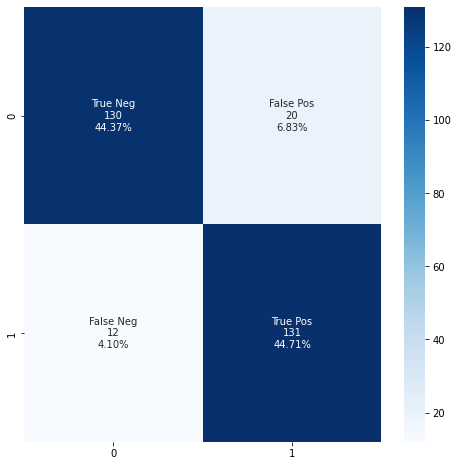

In [76]:
# predict class labels for the test set
y_pred = clf_wo_draw.predict(X_test)

cf_matrix = metrics.confusion_matrix(y_test, y_pred)

group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
				
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
			
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize=(8, 8))  
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
print(metrics.classification_report(y_test, y_pred))

attacks_dangerous: -0.007397502228919005
attacks_total: -0.0018834661387424705
corners: -0.08568501777159004
passes_percentage: 0.07668267227587375
passes_total: 0.0212194111974407
penalties: 0.982274520060793
possession_time: -0.22556730766165964
red_cards: -0.5087005399039486
saves: 0.7134482931326577
shots_insidebox: 0.21994135564143108
shots_offgoal: -0.5747032629765194
shots_ongoal: 0.39927878728474575
shots_outsidebox: 0.1128723576067713
shots_total: 0.4523010611135551


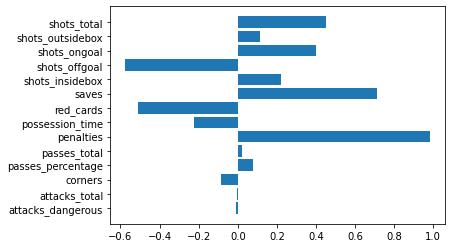

In [77]:
importance = clf_wo_draw.coef_[0]
# summarize feature importance
for imp, col  in zip(importance, predictors):
	print(f"{col}: {imp}")
# plot feature importance
plt.barh(predictors, importance)
plt.show()